Importar as bibliotecas que serão usadas:

In [91]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold

Importar os dados treino e teste já criados:

In [92]:
train = pd.read_csv('/content/drive/My Drive/data/Titanic/train.csv')
test = pd.read_csv('/content/drive/My Drive/data/Titanic/test.csv')

Criar modelo de Machine Learning. Nesse caso, usamos o RandomForestClassifier:

In [93]:
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

Juntar as variáveis que serão usadas no modelo:

In [94]:
variaveis = ['Sex_bin', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

Criar função para transformar os dados do 'sexo' de cada passageiro para numérico, já que o modelo de ML usado não trabalha com strings:

In [95]:
def transformar_sexo(valor) :
  if valor == 'female' :
    return 1
  else:
    return 0

train['Sex_bin'] = train['Sex'].map(transformar_sexo)
test['Sex_bin'] = test['Sex'].map(transformar_sexo)

In [96]:

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bin
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


Separar os dados de variáveis(x) que serão usadas no teste e os resultados esperados(y) para treinar o modelo:

In [97]:
X = train[variaveis]
Y = train['Survived']

Foi necessário tirar os dados sem informação (NaN) e para isso, de forma simples, só transformamos eles em um número sem influência, como -1:

In [105]:
X = X.fillna(-1)
test[variaveis] = test[variaveis].fillna(-1)

# Validação Cruzada

In [99]:
resultados = []
i = 0
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=1)
for linhas_treino, linhas_valid in kf.split(X):
  i = i + 1
  print('Repetição', i)
  print('Treino:', linhas_treino.shape[0])
  print('Valid', linhas_valid.shape[0])

  X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
  Y_treino, Y_valid = Y.iloc[linhas_treino], Y.iloc[linhas_valid]

  modelo.fit(X_treino, Y_treino)
  prev = modelo.predict(X_valid)
  acc = np.mean(Y_valid == prev)
  resultados.append(acc)
  print('Acc:', acc)
  print()
  
print('Média:', np.mean(resultados))

Repetição 1
Treino: 445
Valid 446
Acc: 0.7847533632286996

Repetição 2
Treino: 446
Valid 445
Acc: 0.8292134831460675

Repetição 3
Treino: 445
Valid 446
Acc: 0.7757847533632287

Repetição 4
Treino: 446
Valid 445
Acc: 0.8224719101123595

Repetição 5
Treino: 445
Valid 446
Acc: 0.8026905829596412

Repetição 6
Treino: 446
Valid 445
Acc: 0.7820224719101123

Repetição 7
Treino: 445
Valid 446
Acc: 0.773542600896861

Repetição 8
Treino: 446
Valid 445
Acc: 0.7955056179775281

Repetição 9
Treino: 445
Valid 446
Acc: 0.8026905829596412

Repetição 10
Treino: 446
Valid 445
Acc: 0.8247191011235955

Repetição 11
Treino: 445
Valid 446
Acc: 0.7914798206278026

Repetição 12
Treino: 446
Valid 445
Acc: 0.802247191011236

Repetição 13
Treino: 445
Valid 446
Acc: 0.8139013452914798

Repetição 14
Treino: 446
Valid 445
Acc: 0.8067415730337079

Repetição 15
Treino: 445
Valid 446
Acc: 0.820627802690583

Repetição 16
Treino: 446
Valid 445
Acc: 0.7887640449438202

Repetição 17
Treino: 445
Valid 446
Acc: 0.8004484304

In [100]:
#%matplotlib inline
#%pylab inline

(array([3., 1., 1., 2., 3., 4., 1., 1., 2., 2.]),
 array([0.77078652, 0.77662921, 0.78247191, 0.78831461, 0.7941573 ,
        0.8       , 0.8058427 , 0.81168539, 0.81752809, 0.82337079,
        0.82921348]),
 <a list of 10 Patch objects>)

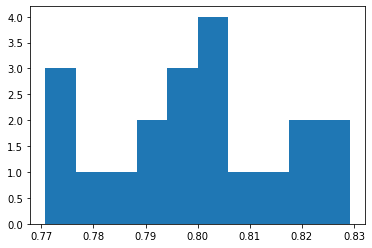

In [101]:
pylab.hist(resultados)

Usando Sex_bin e Age : Média: 0.757

Usando Sex_bin, Age, Pclass, SibSp, Parch e Fare : Média: 0.799

# Retreinar o modelo

In [106]:
modelo.fit(X, Y)
prev = modelo.predict(test[variaveis])


In [108]:
sub = pd.Series(prev, index=test['PassengerId'], name='Survived')

In [109]:
sub.shape

(418,)

In [112]:
sub.to_csv('quinto_modelo.csv')

In [113]:
!head -n10 primeiro_modelo.csv

head: cannot open 'primeiro_modelo.csv' for reading: No such file or directory
